In [1]:
import tensorflow as tf
from tensorflow import keras

2022-12-08 22:13:33.010521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(60000, 28, 28)
(60000,)


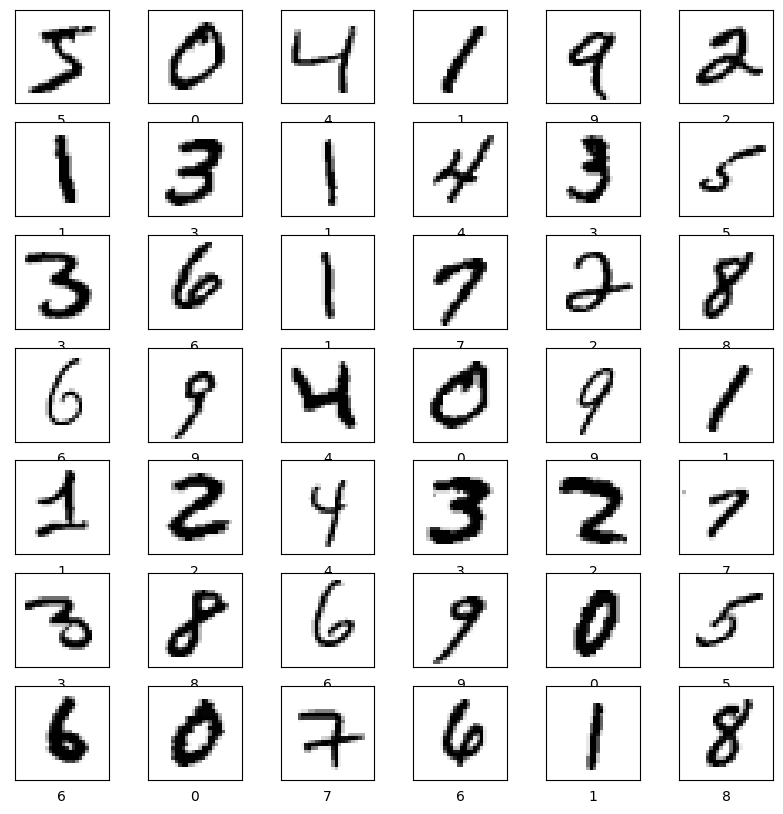

In [3]:
# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # From Tf "Hello World" recommendation

#normalize the data -> representing numbers in memory is to put them on a 0 to 255 scale (8 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)

#plot the  first 42 images in the dataset
plt.figure(figsize=(10,10))
for i in range(42):
    plt.subplot(7,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### Building models for recognizing digits:
As a start implement a linear model  h = Wx - $ \theta\ $ . Initialize W £ R^ 10,784 and $ \theta\ $ £ R ^10  with zeros



In [4]:

# Initialize the weight matrix W ∈ R10×784 to random values
# Initialize the bias vector b ∈ R10 to random values

W = np.zeros((10, 784))
θ = np.zeros((10,1))

# Use the Adam optimizer (TF recommendation)
# Use the accuracy metric (TF recommendation)

# a) Use the softmax operation to normalize the output of the model

model = keras.Sequential([ #sequential ---> multiple layers in it that do different transformations on the data
    keras.layers.Input(x_train.shape[1:]), #input ---> input layer
    keras.layers.Flatten(), #flatten ---> flattens the input
    keras.layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:], use_bias = True, kernel_initializer='zeros', bias_initializer='zeros') #dense ---> fully connected layer
    
])  

# b) Use the categorical cross-entropy loss function
model.compile(
    # c) use a gradient descent algorithm with a constant learning rate η = 0.5.
    optimizer=keras.optimizers.Adam(learning_rate=0.01), #adam ---> tf recommendation for optimizer and this library
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
# d) Process the data in mini-batches. Use one mini-batch for each gradient descent step (one iteration). 
# e) Perform 10,000 iterations for this linear model.
history = model.fit(x_train, y_train, epochs=1000, batch_size=600, validation_data = (x_test,y_test),verbose=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-12-08 22:13:50.465870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_94887/51111.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


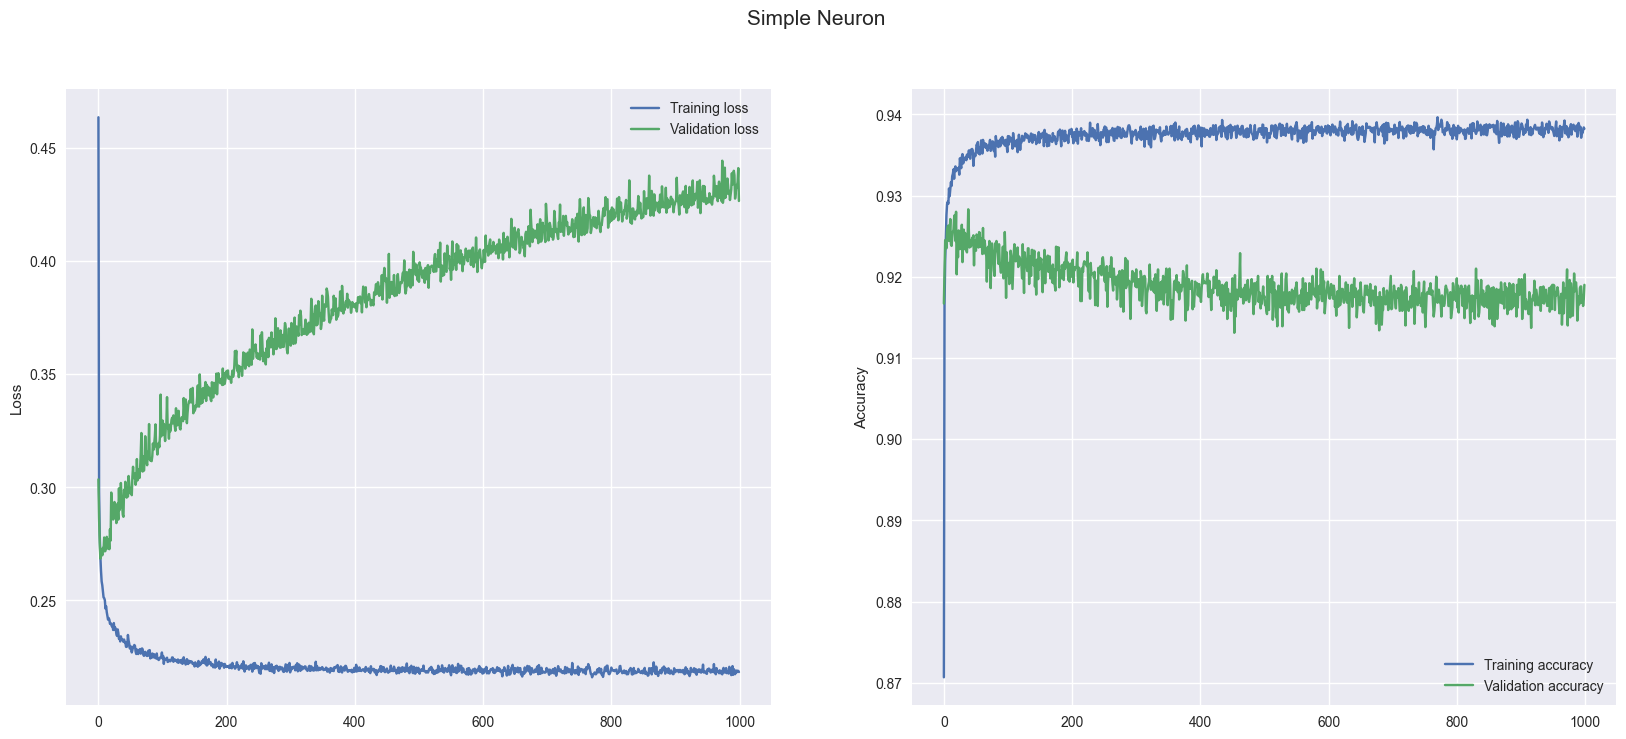

In [5]:
# Plot the results of the model 
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Simple Neuron', fontsize=15)

# Plot the training and validation loss

ax1 = fig.add_subplot(121)

ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
ax1.set_ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig.add_subplot(122)

ax2.plot(history.history['accuracy'], label='Training accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
ax2.set_ylabel('Accuracy')
plt.legend()

plt.show()


313/313 - 0s - loss: 0.4265 - accuracy: 0.9190 - 234ms/epoch - 746us/step
Test accuracy: 0.9190000295639038
313/313 [==============================] - 0s 695us/step


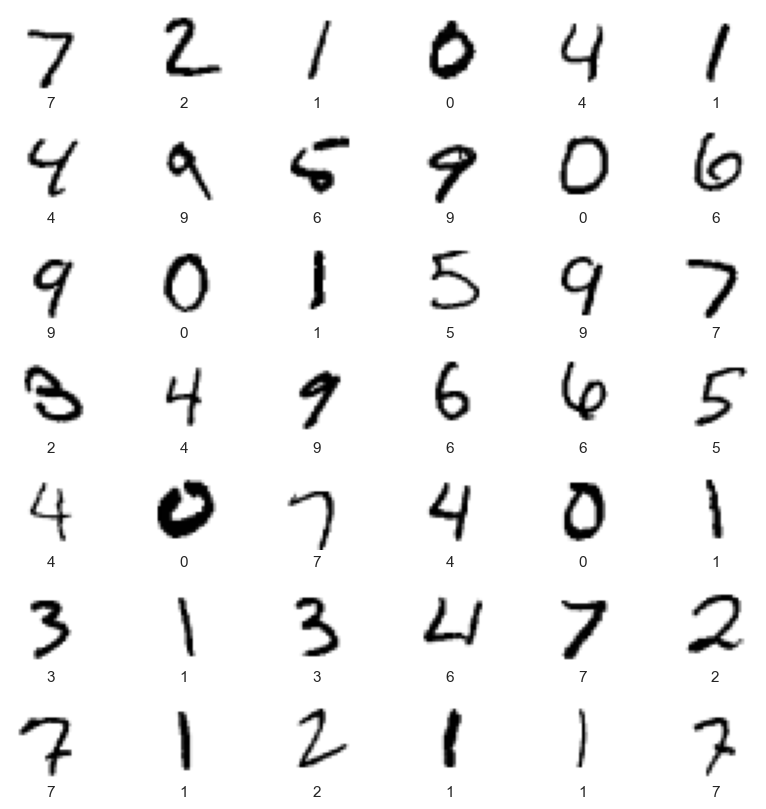

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Predict the labels of the test set
predictions = model.predict(x_test)

# Plot the first 42 images in the test set and their predicted labels
plt.figure(figsize=(10,10))
for i in range(42):
    plt.subplot(7,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
    
plt.subplots_adjust(hspace=0.40)
plt.show()

2. Implement a second model: A fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer

In [8]:
#build a LSTM model with 2 LSTM layers with 1500 hidden neurons in each hidden layer
model_mlp = keras.Sequential([
    keras.layers.Input(x_train.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dense(1500, activation='relu', input_shape=x_train.shape[1:], use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dense(1500, activation='relu', input_shape=x_train.shape[1:], use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None)),
    keras.layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:], use_bias = -0.1, kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=None))
])

model_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam'),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model_mlp.summary()


model_mlphistory = model_mlp.fit(x_train, y_train, epochs=50, batch_size=600, validation_data = (x_test,y_test),verbose=False)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_5 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_6 (Dense)             (None, 10)                15010     
                                                                 
Total params: 3,444,010
Trainable params: 3,444,010
Non-trainable params: 0
_________________________________________________________________


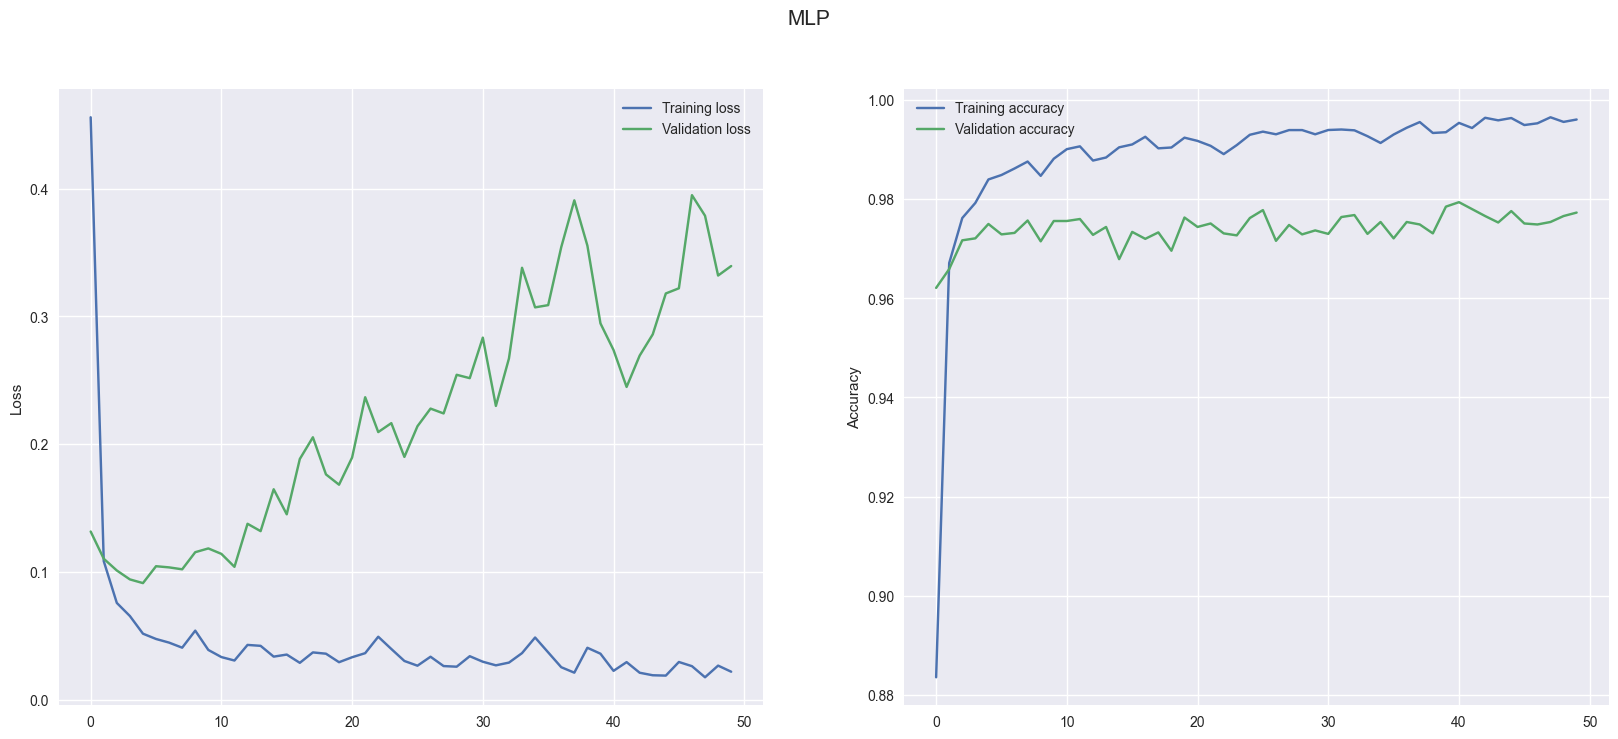

In [9]:
# Plot the results of the model 
fig2 = plt.figure(figsize=(20, 8))
fig2.suptitle('MLP', fontsize=15)

# Plot the training and validation loss

ax1 = fig2.add_subplot(121)

ax1.plot(model_mlphistory.history['loss'], label='Training loss')
ax1.plot(model_mlphistory.history['val_loss'], label='Validation loss')
ax1.set_ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig2.add_subplot(122)

ax2.plot(model_mlphistory.history['accuracy'], label='Training accuracy')
ax2.plot(model_mlphistory.history['val_accuracy'], label='Validation accuracy')
ax2.set_ylabel('Accuracy')
plt.legend()

plt.show()


313/313 - 1s - loss: 0.3394 - accuracy: 0.9773 - 802ms/epoch - 3ms/step
Test accuracy: 0.9772999882698059
313/313 [==============================] - 1s 3ms/step


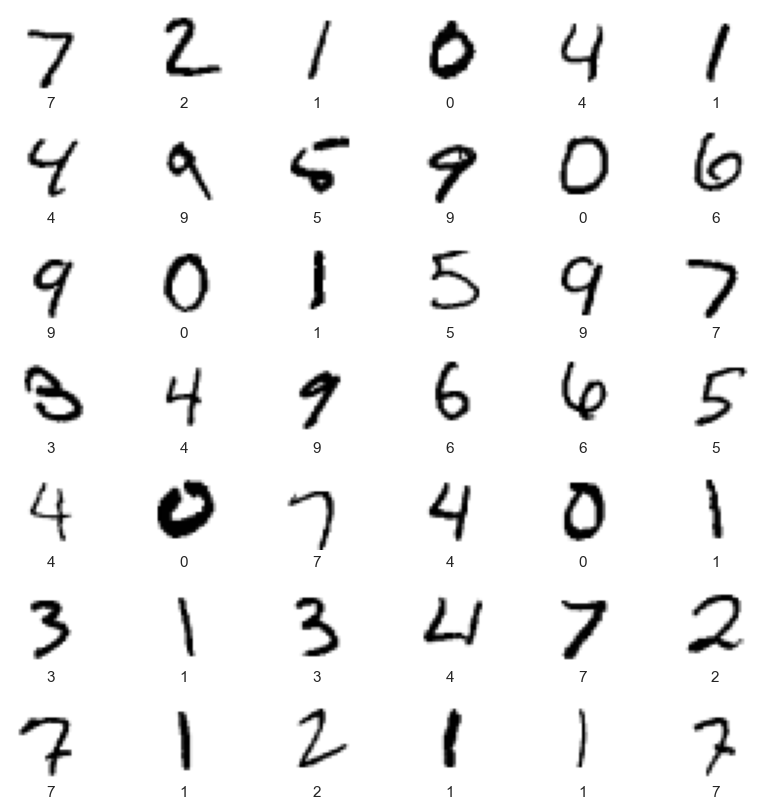

In [11]:
# Evaluate the model
test_loss, test_acc = model_mlp.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Predict the labels of the test set
predictions = model_mlp.predict(x_test)

# Plot the first 42 images in the test set and their predicted labels
plt.figure(figsize=(10,10))
for i in range(42):
    plt.subplot(7,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
    
    
plt.subplots_adjust(hspace=0.40)
plt.show()